In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

<b>A/B Testing</b>: The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Do party affiliation/weightage affect the vote for civil right act?<br>
Hypothesis: that the party of a House member has no relation/relevance on his or her vote.

In [1]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [2]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [5]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)
# here first both datasets will be concatenated, then permutation is applied on whole. 
# We segment out 2 datsets depending on original datasets size called perm_sample1, perm_sample2
# then these 2 samples are fed to a func which takes fraction of democrates voting in favor by total no. of democrates
# and result is stored in an array
# this process is done for bunch of times. We return the resulten array called perm_replicates 


# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0003


#### INSIGHT: This small p-value suggests that party identity had a lot to do with the voting

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [6]:
# CORRELATION:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y )

    # Return entry [0,1]
    return corr_mat[0,1]


In [12]:
df=pd.read_csv('data.csv')
fertility=np.array(df.fertility)
illiteracy=np.array(df.illiteracy)

In [13]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy , fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted , fertility)

# Compute p-value: p
p = np.sum(perm_replicates>=r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


#### INSIGHT: his means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one.

how the pesticide treatment affected the count of live sperm per half milliliter of semen. Alive sperm count for untreated bees (array:control) and bees treated with pesticide (array: treated).

In [16]:
control= np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

In [17]:
treated= np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

In [14]:
def ecdf(data):
    n=len(data)
#     print(n)
    x= np.sort(data)
    y=np.arange(1, n+1) /n
#     print(y)
    return x,y

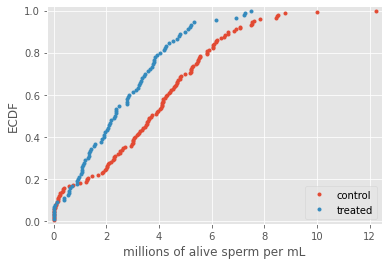

In [18]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


#### INSIGHT: The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm.

hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

In [22]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [23]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


#### INSIGHT: The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed